In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("fraud_data.csv")
data.head(5)

,unique_identifier,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
0,116356,Feb,Product 7,Channel 4,CA,No Bureau Hit,0.0,800,5000,45000,...,0,0,0.0,0,0,0.000,0.0000,0.012,0.2787,0
1,110872,Feb,Product 6,Channel 3,GA,Bureau 1,0.1,775,13000,100000,...,0,0,0.0,0,0,0.999,0.0092,0.070,0.2275,0
2,158686,Jun,Product 6,Channel 1,CA,Bureau 1,5.6,900,2000,100000,...,0,0,0.0,0,0,0.002,0.0015,0.035,0.2787,1
3,148772,May,Product 5,Channel 3,DC,No Bureau Hit,0.0,800,5000,170000,...,1,0,0.0,0,0,0.252,0.0253,0.131,0.1175,0
4,158473,Jun,Product 7,Channel 2,VA,Bureau 1,0.1,775,10000,40000,...,0,0,0.0,0,0,0.000,0.0000,0.000,0.2035,0


In [5]:
data.shape

(62484, 61)

In [7]:
data.describe()

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,...,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.00000,62484.000000,62484.000000,62484.000000
mean,131242.500000,1.890106,772.460550,10731.355227,127925.981051,104.247503,3.834086,7.944882,1.041317e+05,77.085558,...,0.225162,90130.369647,300.165050,7.601146,0.219992,0.053128,0.00312,0.048355,0.202346,0.005809
std,18037.721447,3.294003,71.644113,10303.905843,134003.357926,138.466501,5.519016,11.758840,1.209267e+06,119.646339,...,0.417692,66263.258748,670.473955,5.957123,0.414244,0.166323,0.02954,0.072672,0.066089,0.075999
min,100001.000000,0.000000,525.000000,500.000000,1000.000000,0.000000,0.000000,0.000000,-8.138950e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.054400,0.000000
25%,115621.750000,0.000000,725.000000,2000.000000,55000.000000,0.000000,0.000000,0.000000,2.651645e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.159200,0.000000
50%,131242.500000,0.200000,775.000000,6000.000000,90000.000000,20.000000,1.000000,2.000000,4.831467e+04,0.000000,...,0.000000,117195.500000,101.355000,12.000000,0.000000,0.002000,0.00000,0.029000,0.188400,0.000000
75%,146863.250000,2.700000,800.000000,15000.000000,150000.000000,194.000000,6.000000,13.000000,8.320660e+04,139.000000,...,0.000000,146593.000000,358.155000,12.000000,0.000000,0.022000,0.00050,0.062000,0.227500,0.000000
max,162484.000000,77.400000,900.000000,50000.000000,1000000.000000,786.000000,81.000000,139.000000,1.090704e+08,757.000000,...,1.000000,168817.000000,39592.360000,108.000000,1.000000,0.999000,0.98780,0.888000,0.788200,1.000000


In [8]:
data.describe(percentiles=[0.005, 0.05, 0.25, 0.75, 0.95, 0.995])

,unique_identifier,risk_score_1,bureau_score,limit,income,old_open_trd_ms,no_open_trd,no_trd,debt_cap,basic_max_trd_tnr,...,merchant2_cat,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind
count,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,6.248400e+04,62484.000000,...,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000,62484.000000
mean,131242.500000,1.890106,772.460550,10731.355227,127925.981051,104.247503,3.834086,7.944882,1.041317e+05,77.085558,...,0.225162,90130.369647,300.165050,7.601146,0.219992,0.053128,0.003120,0.048355,0.202346,0.005809
std,18037.721447,3.294003,71.644113,10303.905843,134003.357926,138.466501,5.519016,11.758840,1.209267e+06,119.646339,...,0.417692,66263.258748,670.473955,5.957123,0.414244,0.166323,0.029540,0.072672,0.066089,0.075999
min,100001.000000,0.000000,525.000000,500.000000,1000.000000,0.000000,0.000000,0.000000,-8.138950e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054400,0.000000
0.5%,100313.415000,0.000000,650.000000,1000.000000,15000.000000,0.000000,0.000000,0.000000,-3.826008e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091000,0.000000
5%,103125.150000,0.000000,675.000000,1000.000000,25000.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123900,0.000000
25%,115621.750000,0.000000,725.000000,2000.000000,55000.000000,0.000000,0.000000,0.000000,2.651645e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159200,0.000000
50%,131242.500000,0.200000,775.000000,6000.000000,90000.000000,20.000000,1.000000,2.000000,4.831467e+04,0.000000,...,0.000000,117195.500000,101.355000,12.000000,0.000000,0.002000,0.000000,0.029000,0.188400,0.000000
75%,146863.250000,2.700000,800.000000,15000.000000,150000.000000,194.000000,6.000000,13.000000,8.320660e+04,139.000000,...,0.000000,146593.000000,358.155000,12.000000,0.000000,0.022000,0.000500,0.062000,0.227500,0.000000
95%,159359.850000,8.100000,900.000000,31300.000000,340000.000000,390.000000,15.000000,32.000000,1.781200e+05,328.000000,...,1.000000,164201.000000,1190.794000,12.000000,1.000000,0.273000,0.005600,0.179000,0.321800,0.000000


**Exploratory Data Analysis**

In [9]:
data["default_ind"].value_counts()

default_ind
0    62121
1      363
Name: count, dtype: int64

C:\Users\hi\AppData\Local\Temp\ipykernel_22756\2301598400.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['default_ind'], sort = True)


Text(0, 0.5, 'Frequency')

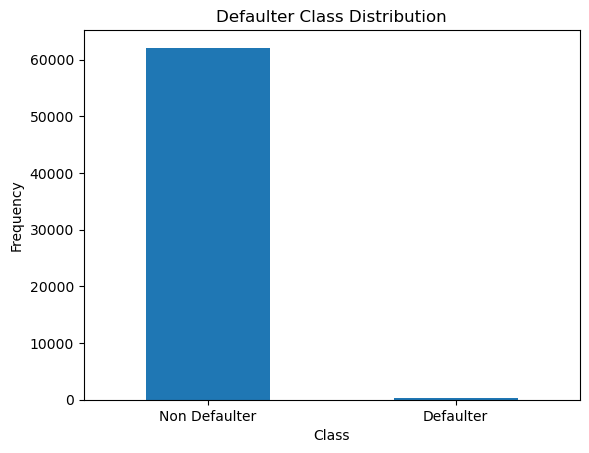

In [17]:
count_classes = pd.value_counts(data['default_ind'], sort = True)
LABELS = ["Non Defaulter", "Defaulter"]

count_classes.plot(kind = 'bar', rot=0)

plt.title("Defaulter Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")

plt.ylabel("Frequency")

The dataset is heavily biased with more than 99% recordds belonging to the class of non defaulters

In [21]:
risk_cols = [col for col in data.columns if col.startswith('risk')]
risk_cols.append(data.columns[-1])
risk_data = data.loc[:,risk_cols].groupby(by = ["default_ind"]).mean().transpose()

In [22]:
risk_data

default_ind,0,1
risk_score_1,1.882658,3.164738
risk_score_2,0.006698,0.023943
risk_score_3,4.924470,39.162534
risk_score_4,115.916308,224.482094
risk_score_5,77.564672,62.848485
risk_score_6,56.934032,40.834711
risk_score_7,271.239130,375.895317
risk_score_8,0.053121,0.054223
risk_score_9,0.003093,0.007780
risk_score_10,0.048357,0.047909


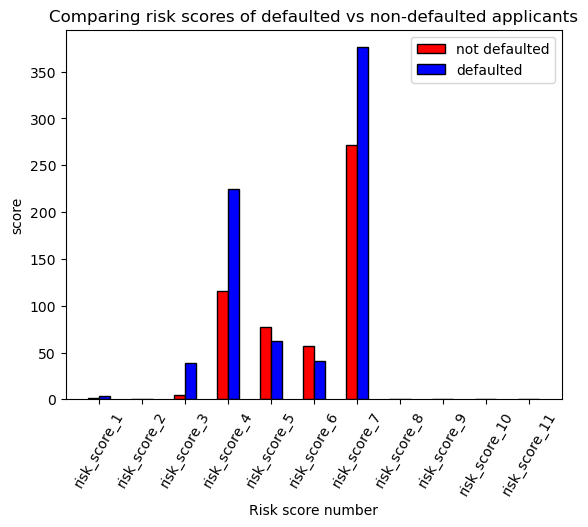

In [23]:
r = np.arange(0,44,4)
plt.figure()

plt.bar(r-0.5, risk_data[0], color='red', width=1, edgecolor='black', label='not defaulted')
plt.bar(r+0.5, risk_data[1], color='blue', width=1, edgecolor='black', label='defaulted')

plt.title("Comparing risk scores of defaulted vs non-defaulted applicants")
plt.xlabel("Risk score number")
plt.ylabel("score")
plt.xticks(r, risk_data.index, rotation = 60)
plt.legend()
plt.show()

Thus, it was observed that the mean values of risk score 4 and risk score 7 are significantly high for defaulted applications compared to non-defaulted applications.
According to the index provided:

Risk_score_4 -> Risk score assigned based on the applicant's email
Risk_score_7 -> Risk score assigned based on the applicant's identity

In [57]:
sub_data1 = data.pivot_table(index = [data.columns[-1], "acq_channel"],
                 values = "income",
                 aggfunc = "mean").unstack().transpose()

sub_data1 = sub_data1.round(2)
sub_data1.reset_index(level = 0, inplace = True)

sub_data1.drop("level_0", axis = 1, inplace = True)

sub_data1["perc"] = (sub_data1[0]-sub_data1[1])*100/sub_data1[0]

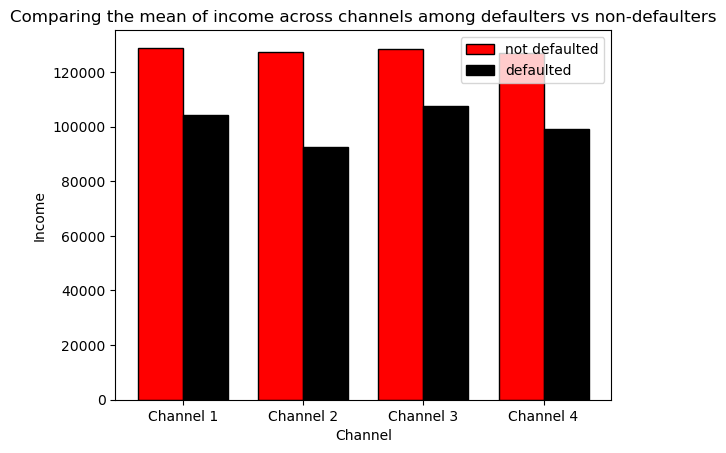

In [72]:
plt.figure()
r = np.arange(0,16,4)

plt.bar(r-0.75, sub_data1[0], width = 1.5, color = 'red', edgecolor='black', label='not defaulted')
plt.bar(r+0.75, sub_data1[1], width = 1.5, color = 'black', edgecolor='black', label='defaulted')

plt.title("Comparing the mean of income across channels among defaulters vs non-defaulters")
plt.xlabel("Channel")
plt.ylabel("Income")
plt.xticks(r, sub_data1.index)
plt.legend()

plt.show()

In [88]:
sub_data1["perc"]

acq_channel
Channel 1    19.252977
Channel 2    27.345033
Channel 3    16.257402
Channel 4    22.020859
Name: perc, dtype: float64

Thus we can safely concludee that Defaulters in each of the channels have a 16 to 27% lesser income compared to non defaulters across all channels

In [90]:
pp_data = data.loc[:,["bureau_score", "limit", "income", "debt_cap", "no_open_trd", "default_ind"]]
pp_data

,bureau_score,limit,income,debt_cap,no_open_trd,default_ind
0,800,5000,45000,207.89000,0,0
1,775,13000,100000,40677.00000,11,0
2,900,2000,100000,59921.61667,1,1
3,800,5000,170000,148803.22610,0,0
4,775,10000,40000,26017.00000,3,0
...,...,...,...,...,...,...
62479,800,31300,150000,85330.00000,6,0
62480,750,27600,150000,68727.33333,0,0
62481,700,1000,70000,21533.00000,8,0
62482,775,5000,160000,85544.50000,0,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

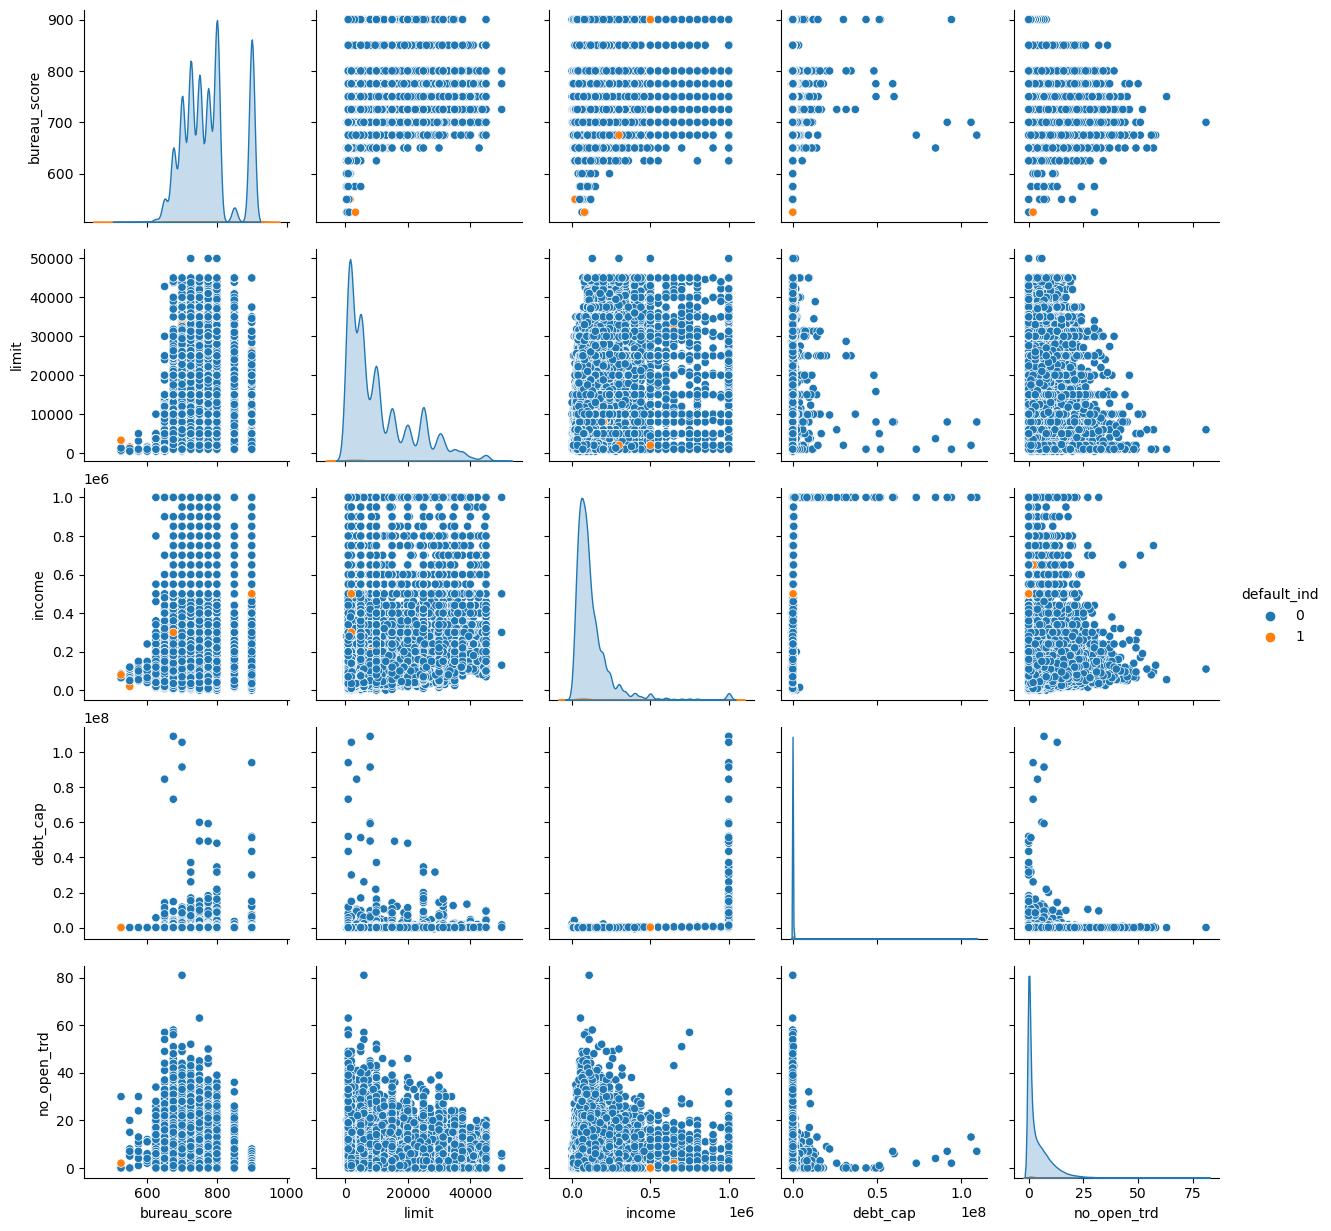

In [94]:
pp_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional, if necessary)
pp_data.dropna(inplace=True)

# Create the pairplot
sns.pairplot(pp_data, hue='default_ind')

Thus, very low bureau score is a signal for a defaulter

In [95]:
fraud = data[data['default_ind']==1]
normal = data[data['default_ind']==0]

d1 = normal.groupby(by = ['appl_month']).count().loc[:,"unique_identifier"]
d2 = fraud.groupby(by = ['appl_month']).count().loc[:,"unique_identifier"]

monthly_comparison = pd.DataFrame({"normal":d1, "fraud":d2})
monthly_comparison["perc"] = monthly_comparison["fraud"]*100/(monthly_comparison["normal"] + monthly_comparison["fraud"])

monthly_comparison = monthly_comparison.reindex(index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"])

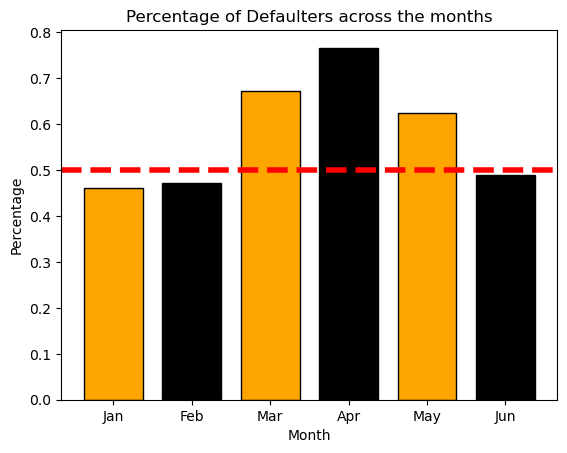

In [96]:
plt.figure()

r = np.arange(0,6,1)

plt.bar(r, monthly_comparison["perc"], color  = ["orange", "Black", "orange", "Black", "orange", "Black"], edgecolor = "Black", width = 0.75)

plt.title("Percentage of Defaulters across the months")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.xticks(r, monthly_comparison.index)
plt.axhline(y = 0.5, color = 'r', linestyle = '--', linewidth = 4)


Thus, the percentage of defaulters exceede 0.5% specifically in the months of March, April and May

In [97]:
data["state_code"].unique()

array(['CA', 'GA', 'DC', 'VA', 'IL', 'FL', 'NY', 'OH', 'MI', 'AL', 'NC',
       'MD', 'NJ', 'TN', 'MN', 'CT', 'WA', 'MA', 'TX', 'MO', 'PA', 'ME',
       'IN', 'AZ', 'VT', 'SC', 'UT', 'OK', 'WI', 'NH', 'RI', 'KS', 'NM',
       'LA', 'DE', 'WV', 'AR', 'CO', 'KY', 'AK', 'NV', 'MS', 'ID', 'OR',
       'IA', 'WY', 'MT', 'NE', 'ND', 'HI', 'SD', 'PR', 'VI'], dtype=object)

In [98]:
seq = data.pivot_table(index = ["state_code", "default_ind"],
                 values = "unique_identifier",
                 aggfunc = "count").unstack()

seq[('unique_identifier', 1)].fillna(0, inplace = True)
seq.columns = ["non_defaulter", "defaulter"]
seq["Perc"] = seq["defaulter"]*100/(seq["defaulter"]+seq["non_defaulter"])

#seq["Perc"].fillna(0, inplace = True)
seq["Perc"] = seq["Perc"].round(2)
seq.sort_values(by = ["Perc"], ascending = [False], inplace = True)

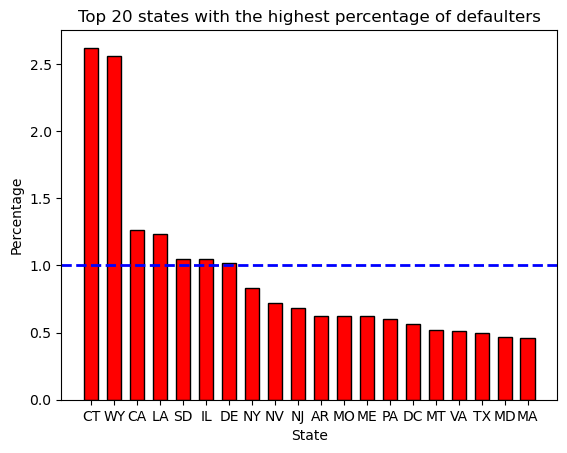

In [99]:
plt.figure()
r = np.arange(0,40,2)

plt.bar(r, seq.iloc[0:20, 2], color = "red", width = 1.25, edgecolor = "Black")
plt.title("Top 20 states with the highest percentage of defaulters")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.xticks(r, seq.index[:20])
plt.axhline(y = 1, color = 'b', linestyle = '--', linewidth = 2)

plt.show()

Thus, states like CT and WY have abnormally high percentage of defaulters compared to all other states. This could be a possible factor to consider. Additionally, in CT, WY, CA, LA, SD and IL, 1 in every 100 applicants appears to be a fraudulent applicant.

In [100]:
sub_data1 = data.pivot_table(index = ["acq_channel", "default_ind"],
                 values = "unique_identifier",
                 aggfunc = "count").unstack()

sub_data1.columns = ["non_defaulter", "defaulter"]
sub_data1["perc"] = sub_data1["defaulter"]*100/(sub_data1["defaulter"]+sub_data1["non_defaulter"])
sub_data1.reset_index(inplace = True)
sub_data1

,acq_channel,non_defaulter,defaulter,perc
0,Channel 1,19317,64,0.330220
1,Channel 2,13221,66,0.496726
2,Channel 3,16588,171,1.020347
3,Channel 4,12995,62,0.474841


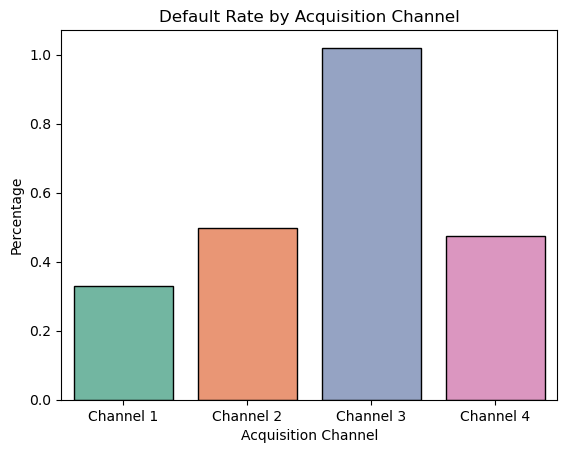

In [101]:
plt.figure()
#acq_channel_default = data.groupby('acq_channel')['default_ind'].mean().reset_index()
sns.barplot(x='acq_channel', y='perc', data=sub_data1, palette='Set2', edgecolor = "black")
plt.title('Default Rate by Acquisition Channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Percentage')
plt.show()

Channel 3 is of importance to study the defaulter trends

In [102]:
sub_data1 = data.pivot_table(index = ["prod_name", "default_ind"],
                 values = "unique_identifier",
                 aggfunc = "count").unstack()
sub_data1.columns = ["non_defaulter", "defaulter"]
sub_data1["defaulter"].fillna(0, inplace = True)
sub_data1["perc"] = sub_data1["defaulter"]*100/(sub_data1["defaulter"]+sub_data1["non_defaulter"])
sub_data1.reset_index(inplace = True)
sub_data1.sort_values(by = ["perc"], ascending = False, inplace = True)
sub_data1


,prod_name,non_defaulter,defaulter,perc
3,Product 12,49.0,2.0,3.921569
6,Product 4,1691.0,15.0,0.879250
0,Product 1,24295.0,200.0,0.816493
2,Product 11,3367.0,22.0,0.649159
8,Product 6,18255.0,98.0,0.533973
10,Product 8,2015.0,5.0,0.247525
9,Product 7,9292.0,21.0,0.225491
1,Product 10,2.0,0.0,0.000000
4,Product 2,87.0,0.0,0.000000
5,Product 3,22.0,0.0,0.000000


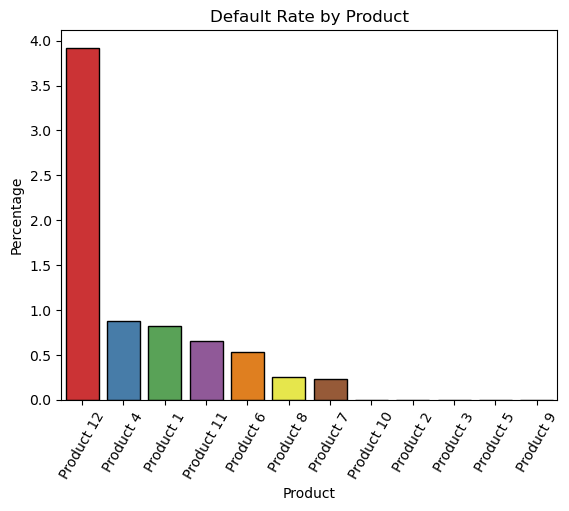

In [103]:
plt.figure()
#acq_channel_default = data.groupby('acq_channel')['default_ind'].mean().reset_index()
sns.barplot(x='prod_name', y='perc', data=sub_data1, palette='Set1', edgecolor = "black")
plt.title('Default Rate by Product')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.xticks(rotation = 60)
plt.show()


Thus, Product 12 has abnormally high percentage of Defaulters. Additionally, few of the products have no defaulters. This tells us that the loophole lies among the other products

In [104]:
sub_data1 = data.pivot_table(index = ["uid_nid_matches", "default_ind"],
                  values = "unique_identifier",
                  aggfunc = "count").unstack()
sub_data1.columns = ["non_defaulter", "defaulter"]
sub_data1["defaulter"].fillna(0, inplace = True)
sub_data1["perc"] = sub_data1["defaulter"]*100/(sub_data1["defaulter"]+sub_data1["non_defaulter"])
sub_data1.reset_index(inplace = True)
sub_data1.sort_values(by = ["uid_nid_matches"], ascending = True, inplace = True)
sub_data1

,uid_nid_matches,non_defaulter,defaulter,perc
0,-1,34396.0,62.0,0.179929
1,0,4834.0,80.0,1.628002
2,1,922.0,4.0,0.431965
3,2,2455.0,26.0,1.047965
4,3,9127.0,98.0,1.062331
5,4,2051.0,10.0,0.485201
6,5,2862.0,32.0,1.105736
7,6,4339.0,36.0,0.822857
8,7,986.0,14.0,1.400000
9,8,122.0,1.0,0.813008


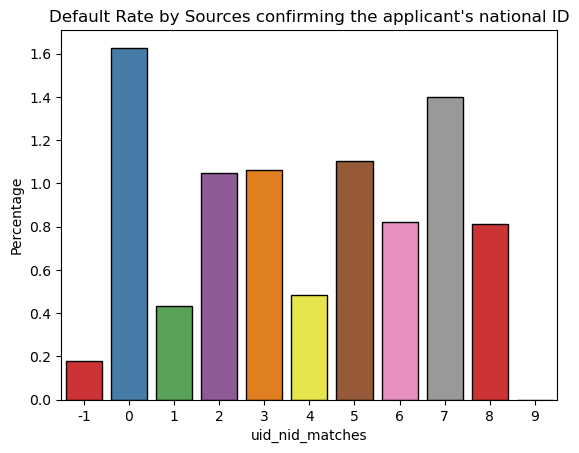

In [105]:
plt.figure()
#acq_channel_default = data.groupby('acq_channel')['default_ind'].mean().reset_index()
sns.barplot(x='uid_nid_matches', y='perc', data=sub_data1, palette='Set1', edgecolor = "black")
plt.title("Default Rate by Sources confirming the applicant's national ID")
plt.xlabel('uid_nid_matches')
plt.ylabel('Percentage')
plt.xticks()
plt.show()


In [106]:
sub_data1 = data.pivot_table(index = ["dl_id", "default_ind"],
                  values = "unique_identifier",
                  aggfunc = "count").unstack()
sub_data1.columns = ["non_defaulter", "defaulter"]
sub_data1["defaulter"].fillna(0, inplace = True)
sub_data1["perc"] = sub_data1["defaulter"]*100/(sub_data1["defaulter"]+sub_data1["non_defaulter"])
sub_data1.reset_index(inplace = True)
sub_data1.sort_values(by = ["dl_id"], ascending = True, inplace = True)
sub_data1


,dl_id,non_defaulter,defaulter,perc
0,-1,30130.0,26.0,0.086218
1,0,11228.0,173.0,1.517411
2,1,86.0,0.0,0.000000
3,2,7721.0,59.0,0.758355
4,3,166.0,1.0,0.598802
5,4,3017.0,43.0,1.405229
6,5,1.0,0.0,0.000000
7,6,5608.0,36.0,0.637845
8,7,4164.0,25.0,0.596801


In [107]:
sub_data1 = data.pivot_table(index = ["bureau_score", "default_ind"],
                  values = "unique_identifier",
                  aggfunc = "count").unstack()
sub_data1.columns = ["non_defaulter", "defaulter"]
sub_data1["defaulter"].fillna(0, inplace = True)
sub_data1["perc"] = sub_data1["defaulter"]*100/(sub_data1["defaulter"]+sub_data1["non_defaulter"])
sub_data1.reset_index(inplace = True)
sub_data1.sort_values(by = ["bureau_score"], ascending = True, inplace = True)
sub_data1

,bureau_score,non_defaulter,defaulter,perc
0,525,3.0,1.0,25.000000
1,550,7.0,1.0,12.500000
2,575,11.0,0.0,0.000000
3,600,11.0,0.0,0.000000
4,625,166.0,0.0,0.000000
5,650,1342.0,7.0,0.518903
6,675,4309.0,31.0,0.714286
7,700,7319.0,38.0,0.516515
8,725,9383.0,37.0,0.392781
9,750,8513.0,40.0,0.467672
